# Задача

Для производства двух сортов мороженого (сливочного и молочного) комбинат
использует сахар и сливки. Нормы затрат этих продуктов, суточные запасы, а также цена
реализации по каждому виду мороженого приведены в таблице.

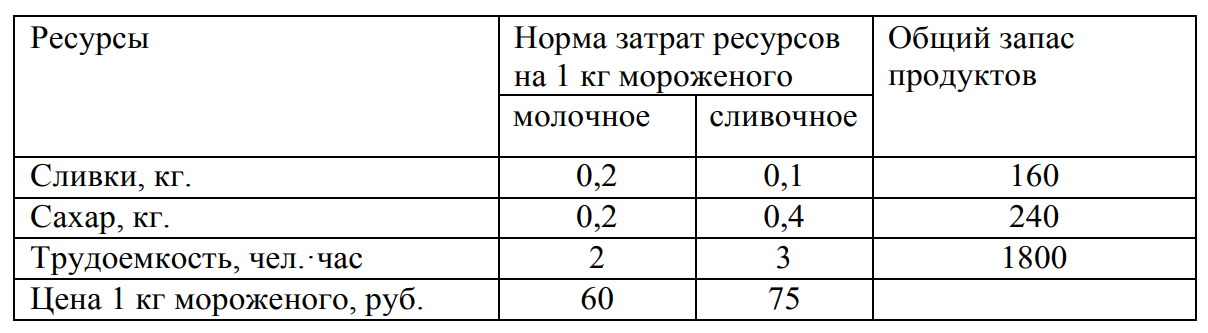

1. Считая, что сбыт мороженого полностью обеспечен, определить, сколько сливочного и молочного мороженого должен выпускать в сутки комбинат, чтобы доход от реализации был максимальным.

2. Определить, увеличение запасов каких продуктов наиболее целесообразно и почему.

3. Если фонд рабочего времени снизится на 300 чел. час, как это повлияет на решение?

4. Если цена 1 кг молочного мороженого возрастет до 90 руб., как это повлияет на определение суточного плана производства?


## Построение математической модели

*Считая, что сбыт мороженого полностью обеспечен, определить, сколько сливочного и молочного мороженого должен выпускать в сутки комбинат, чтобы доход от реализации был максимальным.*

Для решения первого пункта составим математическую модель данной задачи. Необходимо узнать, сколько килограмм сливочного и молочного мороженого должен выпускать комбинат. Для типов мороженого введем соответствующие переменные:

- $x$ -- 1 кг молочного мороженого;

- $y$ -- 1 кг сливочного мороженого.

Нам необходимо максимизировать доход от продажи мороженого, при этом вычислить, сколько килограмм для этого нужно продать. Математически это можно сформулировать следующим образом:
$$60x + 75y \to \max.$$
То есть функция $z(x,y) = 60x+ 75y$ и будет являться целевой функцией. 

Необходимо составить ограничения на производство. Их можно составить непосредственно из таблицы, при этом учитывая, что килограммы не могут быть отрицательны, то есть $x, y\geq 0$. Таким образом, имеем задачу линейного программирования
$$z(x,y) = 60x + 75y \to \max.$$
$$\begin{cases}
0.2x + 0.1 y \leq 160,\\
0.2x + 0.4 y \leq 240,\\
2x+3y \leq 1800.
\end{cases}$$
$$x,y \geq 0.$$

## Программная реализация решения задачи

Данаая задача решается на плоскости, поэтому для ее решения можно использовать либо графический метод, либо симплекс метод.

Сперва приведем реализацию графического метода для данной задачи, где пунктирными линиями мы обозначим линии уровня целевой функции.

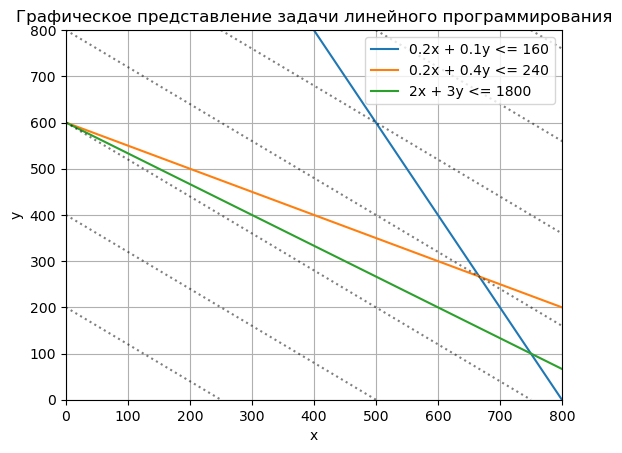

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_linear_programming_problem():
    x = np.linspace(0, 1000, 1000)
    y1 = (160 - 0.2 * x) / 0.1
    y2 = (240 - 0.2 * x) / 0.4
    y3 = (1800 - 2 * x) / 3

    z = lambda x, y: 60 * x + 75 * y

    fig, ax = plt.subplots()
    ax.plot(x, y1, label='0.2x + 0.1y <= 160')
    ax.plot(x, y2, label='0.2x + 0.4y <= 240')
    ax.plot(x, y3, label='2x + 3y <= 1800')
    ax.set_xlim((0, 800))
    ax.set_ylim((0, 800))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Графическое представление задачи линейного программирования')

    x_values = np.linspace(0, 1000, 100)
    y_values = np.linspace(0, 3000, 100)
    X, Y = np.meshgrid(x_values, y_values)
    Z = z(X, Y)
    ax.contour(X, Y, Z, levels=20, colors='black', alpha=0.5, linestyles='dotted')

    ax.legend()
    ax.grid(True)

    plt.show()

plot_linear_programming_problem()

Таким образом, решением задачи является точка пересечения прямых $0.2x+0.1y = 160$ и $0.2x + 0.4y = 240$. Из второго уравнения можно вычесть первое и получить $$y=\dfrac{800}{3}.$$
Тогда $$x = \dfrac{2000}{3}.$$
Отсюда оптимальное решение $$(x^0, y^0) = \left(\dfrac{2000}3, \dfrac{80}3\right).$$

Теперь построим решение задачи симплекс методом с помощью библиотеки OR-Tools.

In [26]:
#pip install ortools

In [25]:
from ortools.linear_solver import pywraplp


def solve_lp_problem():
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")
    
    solver.Add(0.2 * x + 0.1 * y <= 160)
    solver.Add(0.2 * x + 0.4 * y <= 240)
    solver.Add(2* x - 3 * y <= 1800)

    solver.Maximize(60 * x + 75 * y)

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print(f"Objective value = {solver.Objective().Value()}")
        print(f"x = {x.solution_value()}")
        print(f"y = {y.solution_value()}")
    else:
        print("The problem does not have an optimal solution.")

    print(f"Problem solved in {solver.iterations():d} iterations")


solve_lp_problem()

Solving with Glop solver v9.9.3963
Solution:
Objective value = 60000.0
x = 666.6666666666667
y = 266.6666666666666
Problem solved in 2 iterations


В итоге получили идентичное решение. Также мы выяснили, что значение целевой функции в оптимальной токчке равно $$z(x^0, y^0)=60000.$$

*Определить, увеличение запасов каких продуктов наиболее целесообразно и почему.*

Для определения наиболее целесообразного увеличения запасов продуктов, нужно проанализировать ограничения модели. В данном случае, увеличение запасов сливок или сахара будет целесообразным, если соответствующие ограничения станут более жесткими. То есть, если при увеличении запасов на единицу, значение соответствующего ограничения увеличится, то это будет иметь положительный эффект на максимизацию дохода.

*Если фонд рабочего времени снизится на 300 чел. час, как это повлияет на решение?*

Для ответа на этот вопрос необходимо изменить соответствующие ограничения в задаче линейного программирования. В частности мы изменим 3 ограничение, считая теперь, что у нас трудоемкость 1500 чел/час.

Таким образом, имеем задачу линейного программирования
$$z(x,y) = 60x + 75y \to \max.$$
$$\begin{cases}
0.2x + 0.1 y \leq 160,\\
0.2x + 0.4 y \leq 240,\\
2x+3y \leq 1500.
\end{cases}$$
$$x,y \geq 0.$$

In [28]:
def solve_lp_problem_1():
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")
    
    solver.Add(0.2 * x + 0.1 * y <= 160)
    solver.Add(0.2 * x + 0.4 * y <= 240)
    solver.Add(2* x - 3 * y <= 1500)

    solver.Maximize(60 * x + 75 * y)

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print(f"Objective value = {solver.Objective().Value()}")
        print(f"x = {x.solution_value()}")
        print(f"y = {y.solution_value()}")
    else:
        print("The problem does not have an optimal solution.")

    print(f"Problem solved in {solver.iterations():d} iterations")


solve_lp_problem_1()

Solving with Glop solver v9.9.3963
Solution:
Objective value = 60000.0
x = 666.6666666666666
y = 266.66666666666663
Problem solved in 3 iterations


Как можно заметить, данное нововведение никак не повлияло на результат решения задачи линейного программирования.

*Если цена 1 кг молочного мороженого возрастет до 90 руб., как это повлияет на определение суточного плана производства?*

Для решения этой задачи мы изменим целевую функцию, учитывая новую цену за килограмм молочного мороженого. Таким образом, задача линейного программирования будет получена следующая:
$$z(x,y) = 90x + 75y \to \max.$$
$$\begin{cases}
0.2x + 0.1 y \leq 160,\\
0.2x + 0.4 y \leq 240,\\
2x+3y \leq 1800.
\end{cases}$$
$$x,y \geq 0.$$

In [29]:
def solve_lp_problem_1():
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")
    
    solver.Add(0.2 * x + 0.1 * y <= 160)
    solver.Add(0.2 * x + 0.4 * y <= 240)
    solver.Add(2* x - 3 * y <= 1800)

    solver.Maximize(90 * x + 75 * y)

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print(f"Objective value = {solver.Objective().Value()}")
        print(f"x = {x.solution_value()}")
        print(f"y = {y.solution_value()}")
    else:
        print("The problem does not have an optimal solution.")

    print(f"Problem solved in {solver.iterations():d} iterations")


solve_lp_problem_1()

Solving with Glop solver v9.9.3963
Solution:
Objective value = 80000.0
x = 666.6666666666667
y = 266.6666666666666
Problem solved in 2 iterations


Как можно увидеть, данное нововведение повлияло лишь на значение целевой функции в ее точке максимума. Оптимальное решение же осталось неизменным.